# Agrupamento e redução de dimensionalidade do Fashion-MNIST

Nesta atividade colocaremos em prática tudo que aprendemos até agora em um novo dataset: o Fashion-MNIST. Esse conjunto de dados é formado por imagens de tamanho 28x28 pixels em tons de cinza. As imagens presentes são compostas por artigos de vestuário. Como é uma base de dados razoavelmente grande, utilizaremos aqui uma amostra de 10000 imagens, sendo 1000 de cada classe. A base de dados foi disponibilizada [neste link ](https://www.kaggle.com/zalando-research/fashionmnist), o qual possui mais informações.

Para esta atividade você deve realizar as seguintes tarefas: 

* Realize agrupamentos sobre este conjunto de dados:
    * Agrupamento através do K-Means:
        * Determine através do método do cotovelo a quantidade ideal de clusters. A quantidade de clusters indicada pelo método do cotovelo casa com o número real de classes (10)? Se não, por que você acha que não?
        * Analise a silhueta e pureza do agrupamento considerando o número de grupos indicado pelo método do cotovelo e o número de grupos ideal (k=10). Que conclusões você pode tirar?
    * Agrupamento Hierárquico:
        * Determine através do dendograma a quantidade ideial de clusters. A quantidade de clusters indicada pelo método da silhueta casa com o número real de classes (10)? Se não, por que você acha que não?
        * Analise a silhueta e pureza do agrupamento considerando o número de grupos indicado pelo dendograma e o número de grupos ideal (k=10).
* Redução de dimensionalidade como pré-processamento ao Agrupamento
    * Redução de dimensionalidade através do t-SNE:
        * Reduza a quantidade de dimensões para duas dimensões.
        * Visualize os dados em duas dimensões. Você percebe agrupamentos naturais nos dados?
        * Aplique novamente o agrupamento que teve melhores resultados no passo anterior (sem t-SNE) considerando k=10.
        * Analise a silhueta e pureza do agrupamento. O que aconteceu com os resultados quando comparamos com a versão sem usar t-SNE? Que conclusões você pode tirar? 
        * Teste diferentes números de dimensões para tentar melhorar os resultados.
    * Redução de dimensionalidade através do PCA:
        * Reduza a quantidade de dimensões para duas dimensões.
        * Visualize os dados em duas dimensões. Você percebe agrupamentos naturais nos dados?
        * Aplique novamente o agrupamento que teve melhores resultados no passo anterior (sem PCA) considerando k=10. 
        * Analise a silhueta e pureza do agrupamento. O que aconteceu com os resultados quando comparamos com a versão sem usar PCA? Que conclusões você pode tirar? 
        * Teste diferentes números de dimensões para tentar melhorar os resultados.
* Ao final mostre qual foi a melhor técnica de agrupamento e a melhor técnica de redução de dimensionalidade.

## Atividade Bônus

Utilize a redução de dimensionalidade para o contexto de aprendizagem supervisionada:

* Separe o conjunto de dados em treino e teste na proporção 75%/25% respectivamente.
* Treine um modelo de sua escolha com os dados originais. 
    * Compute a acurácia e o f1-score
* Treino um modelo de sua escolha com os dados em dimensionalidade reduzida. Utilize a técnica de redução de dimensionalidade e parâmetros que obtiveram melhores resultados.
* Por último, compare os resultados.



In [0]:
!pip install  ipython-autotime
%load_ext autotime

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

time: 806 ms


In [0]:
import pandas as pd

#fashion_mnist = pd.read_csv("https://orionwinter.github.io/datasets/fashion-mnist_test.csv")
fashion_mnist = pd.read_csv("fashion-mnist_train.csv")
fashion_mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


time: 5.06 s


In [0]:
def get_data(limit=None):
    df = pd.read_csv("fashion-mnist_train.csv")
    data = df.values
    np.random.shuffle(data)
    X = data[:,1:]/255 #dados na escola [0,255]. Cada valor é uma intensidade de pixel
    Y = data[:,0]#data is from 0..255
    if limit is not None:
        X,Y = X[:limit], Y[:limit] #limit define a quantidade de linhas a serem usadas na análise
    return X,Y

time: 6.63 ms


In [0]:
X, Y = get_data(10000) #Nesse momento estamos colocando 10k imagens aos 10k rótulos
X.shape

(10000, 784)

time: 5.95 s


In [0]:
from sklearn.metrics.cluster import contingency_matrix
def purity(true_labels, pred_labels):
    cg = contingency_matrix(true_labels, pred_labels)
    purities = {}
    purity = 0
    k = cg.shape[0]
    for i in range(k):
        purities[i] = np.max(cg[i])/np.sum(cg[i])
        purity += purities[i]
    return (purities, purity/k)

time: 6.21 ms


In [0]:
def purity2 (X, Y, y_g, k):
    purities = {}
    purity = 0
    for i in range(k):
        purities[i] = stats.mode(Y[y_g == i])[1][0]/len(Y[y_g == i])
        purity += purities[i]
    return (purities, purity/k)

time: 11.5 ms


## Agrupamento atraves do k-means

In [0]:
inertia = []
for n in range(1,21):
    km = (KMeans(n_clusters = n, init='k-means++',n_init = 10, max_iter=300, tol=0.0001, random_state=0))
    km.fit(X)
    inertia.append(km.inertia_)
    

time: 3min 45s


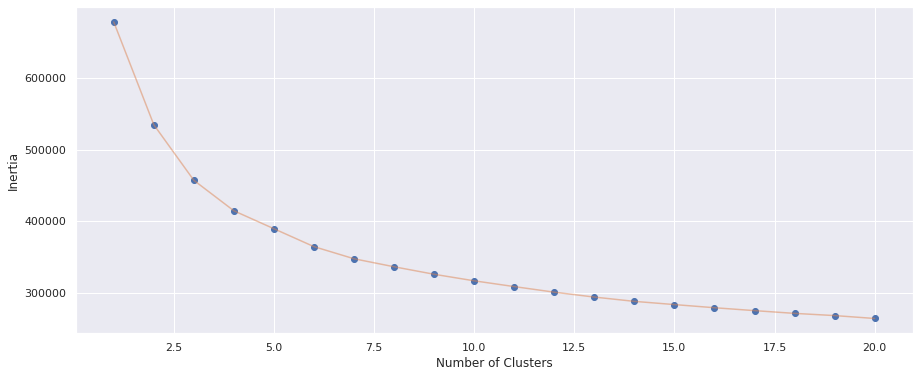

time: 414 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,21), inertia, 'o')
plt.plot(np.arange(1,21),inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

* Determine através do método do cotovelo a quantidade ideal de clusters. A quantidade de clusters indicada pelo método do cotovelo casa com o número real de classes (10)? Se não, por que você acha que não?
* R: Se você testar tentando dividir o conjunto de dados em mais conjuntos, você obterá uma inercia menor e uma maior pureza. Sendo assim, podemos dizer que o modelo não consegue separar bem o modelo real.

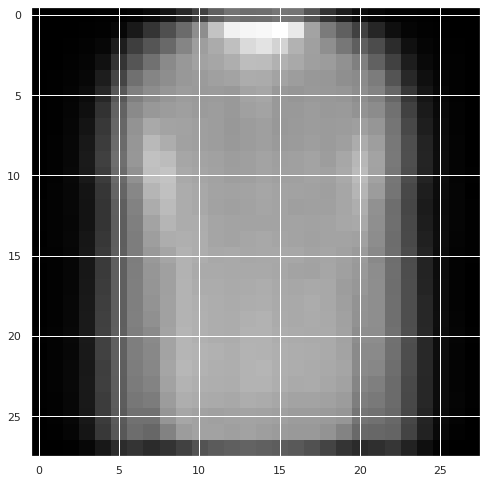

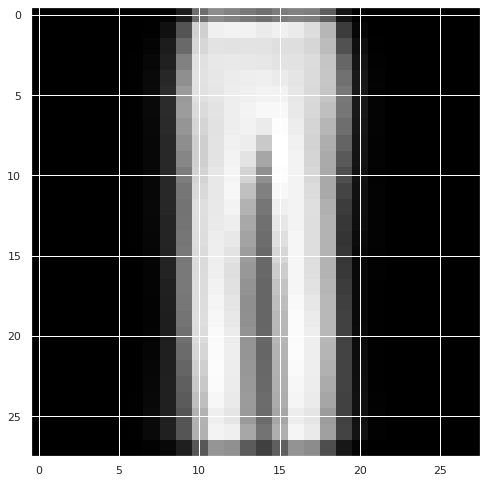

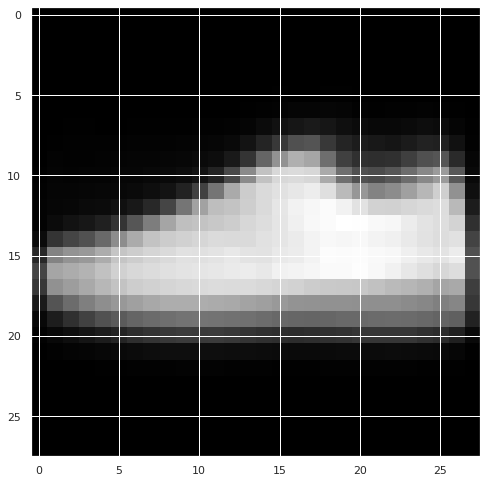

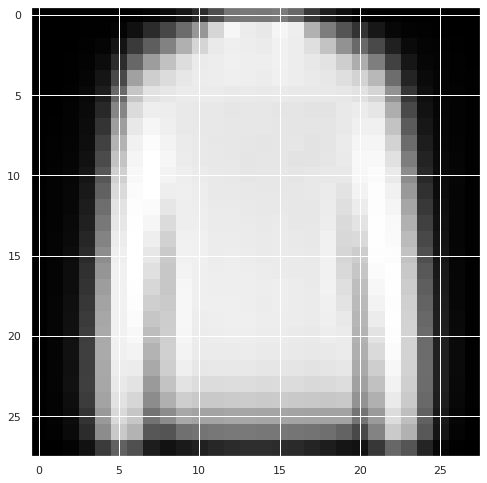

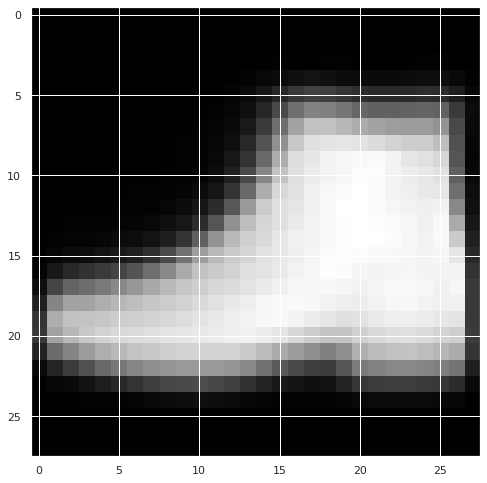

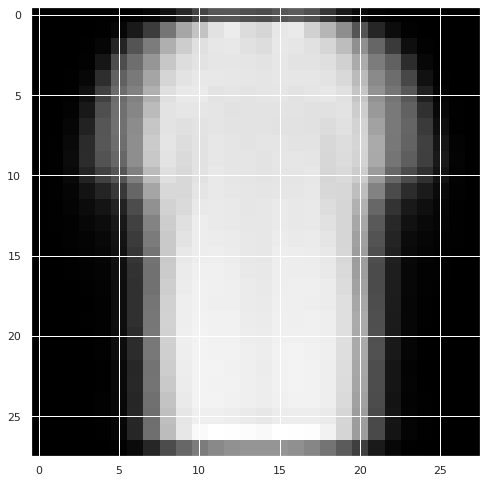

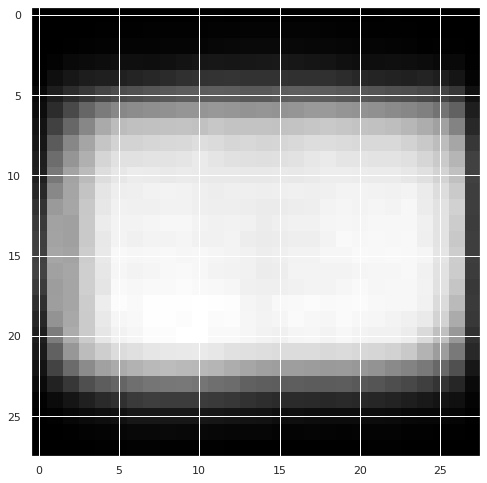

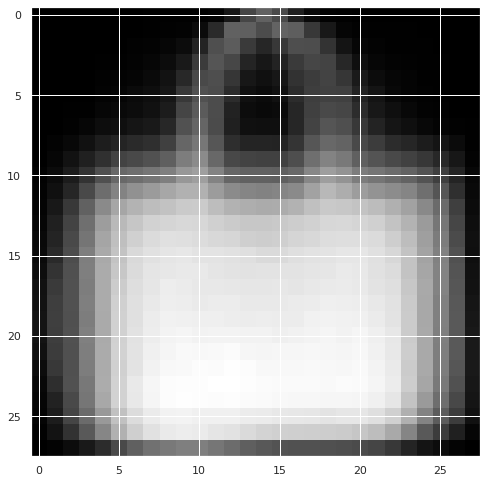

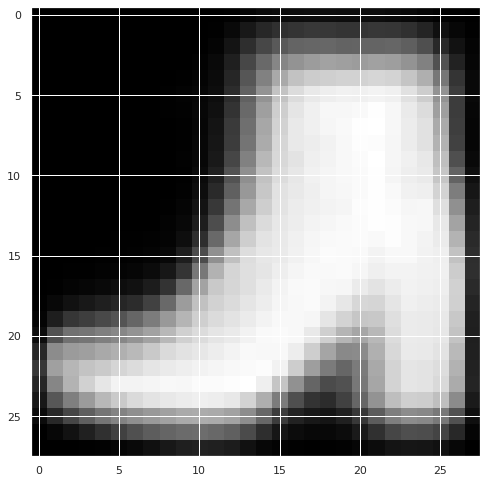

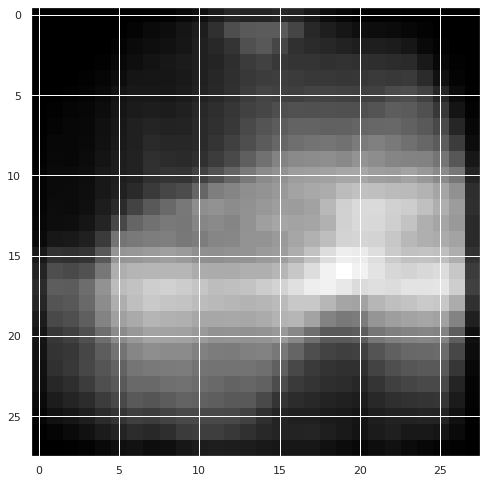

time: 16 s


In [0]:
#mnist data
km = (KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0))
y_km = km.fit_predict(X)
centroids = km.cluster_centers_

#plota as imagens dos centroides

for k in range(len(centroids)):
    im = centroids[k].reshape(28,28)
    plt.imshow(im, cmap='gray')
    plt.show()
    
    # pegando o centroide de cada grupo e plotando a imagem ( imagens dos grupos)

In [0]:
km = (KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0))
y_km = km.fit_predict(X)

time: 12.3 s


In [0]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X, y_km, metric='euclidean'))
print("Pureza K-Means: %0.3f" %purity2(X,Y,y_km,10)[1])

Coeficiente de Silhueta K-Means: 0.153
Pureza K-Means: 0.649
time: 3.84 s


In [0]:
km = (KMeans(n_clusters = 5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0))
y_km = km.fit_predict(X)

time: 8.06 s


In [0]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X, y_km, metric='euclidean'))
print("Pureza K-Means: %0.3f" %purity2(X,Y,y_km,5)[1])

Coeficiente de Silhueta K-Means: 0.157
Pureza K-Means: 0.398
time: 3.64 s


In [0]:
purity_array = []
for n in range(1,21):
    km = (KMeans(n_clusters = n, init='k-means++',n_init = 10, max_iter=300, tol=0.0001, random_state=0))
    y_km = km.fit_predict(X)
    #purity_label = purity(Y,y_km)[1]
    purity_label = purity2(X,Y,y_km,n)[1]
    purity_array.append(purity_label)

time: 3min 47s


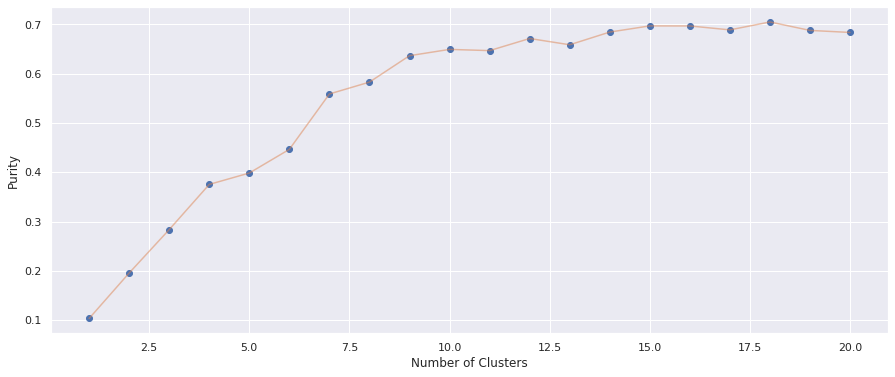

time: 355 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,21), purity_array, 'o')
plt.plot(np.arange(1,21),purity_array, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Purity')
plt.show()

In [0]:
silhouette_array = []
for n in range(2,11):
    km = (KMeans(n_clusters = n, init='k-means++',n_init = 10, max_iter=300, tol=0.0001, random_state=0))
    y_km = km.fit_predict(X)
    silhouette_label = metrics.silhouette_score(X, y_km,metric='euclidean')
    silhouette_array.append(silhouette_label)

time: 1min 48s


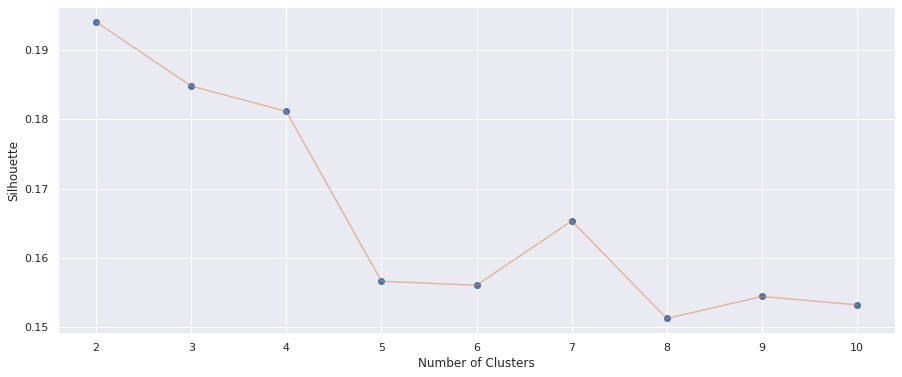

time: 373 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(2,11), silhouette_array, 'o')
plt.plot(np.arange(2,11),silhouette_array, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Silhouette')
plt.show()

* Analise a silhueta e pureza do agrupamento considerando o número de grupos indicado pelo método do cotovelo e o número de grupos ideal (k=10). Que conclusões você pode tirar?
* R: Ao aumentar o numero de grupos, a silhueta piora mas a pureza melhora. É interessante notar que mesmo acima de dez grupos, a pureza continua aumentando. 

## Agrupamento hierarquico

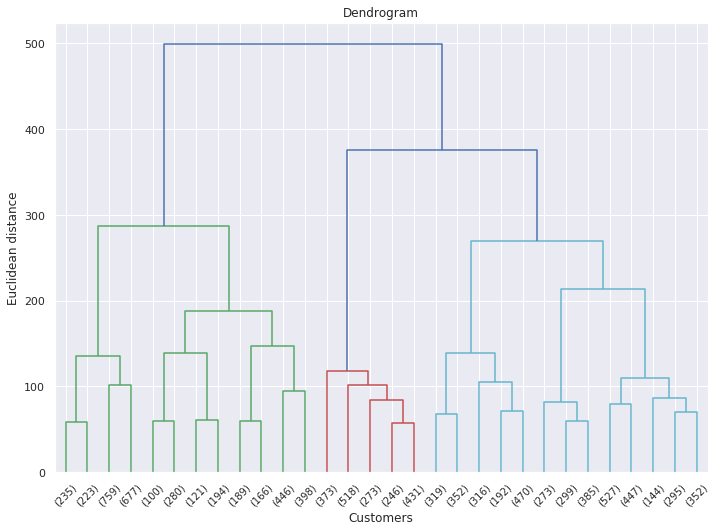

time: 44.1 s


In [0]:
import scipy.cluster.hierarchy as sch
dendrogran = sch.dendrogram(sch.linkage(X, method= 'ward'),truncate_mode ='lastp')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

* Determine através do dendograma a quantidade ideial de clusters. A quantidade de clusters indicada pelo método do cotovelo casa com o número real de classes (10)? Se não, por que você acha que não?
* R: Pelo dendograma, ele indica que o número ideal de clusteres é 3. Isso provavelmente se dá pela similaridade dos objetos analisados, mas não condiz com a separação real dos dados. 

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(X)

time: 43.8 s


In [0]:
print("Coeficiente de Silhueta Hierarquico: %0.3f" % metrics.silhouette_score(X, y_agg, metric='euclidean'))
print("Pureza Hierarquico: %0.3f" %purity2(X,Y,y_agg,3)[1])

Coeficiente de Silhueta Hierarquico: 0.165
Pureza Hierarquico: 0.289
time: 3.7 s


In [0]:
purity_array = []
for n in range(1,11):
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    y_agg = cluster.fit_predict(X)
    #purity_label = purity(Y,y_km)[1]
    purity_label = purity2(X,Y,y_agg,n)[1]
    purity_array.append(purity_label)

time: 7min 19s


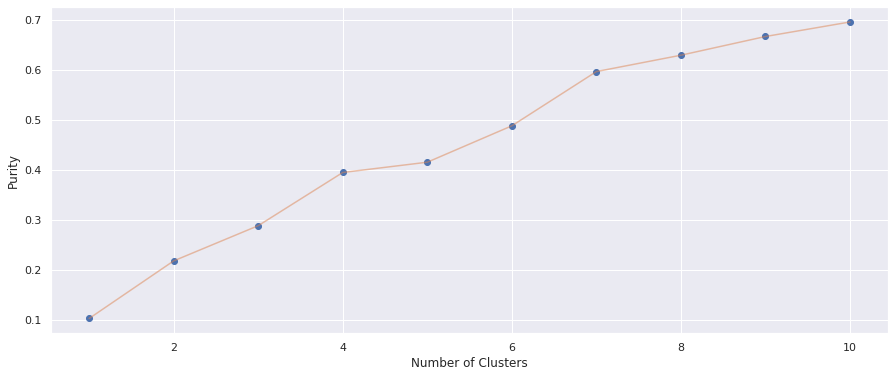

time: 461 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), purity_array, 'o')
plt.plot(np.arange(1,11),purity_array, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Purity')
plt.show()

In [0]:
silhouette_array = []
for n in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    y_agg = cluster.fit_predict(X)
    silhouette_label = metrics.silhouette_score(X, y_agg,metric='euclidean')
    silhouette_array.append(silhouette_label)

time: 7min 6s


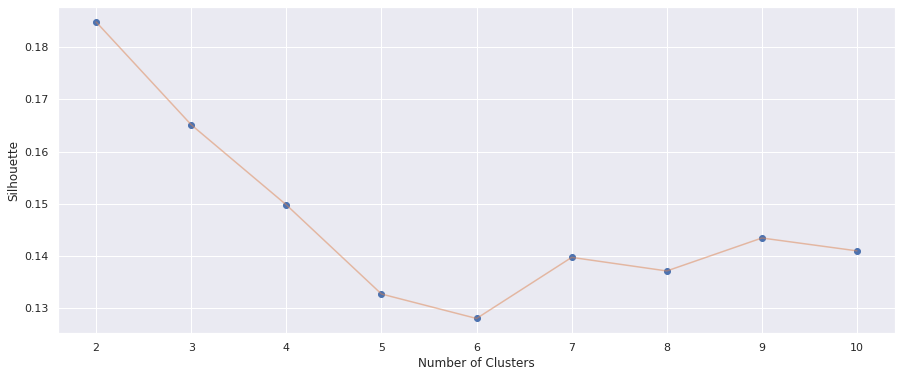

time: 403 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(2,11), silhouette_array, 'o')
plt.plot(np.arange(2,11),silhouette_array, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Silhouette')
plt.show()

* Analise a silhueta e pureza do agrupamento considerando o número de grupos indicado pelo dendograma e o número de grupos ideal (k=10).
* R: Pureza sim e Silhueta não. Como temos os rótulos, então podemos desconsiderar a silhueta. 

## t-SNE

* Reduza a quantidade de dimensões para duas dimensões.

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

time: 4min 50s


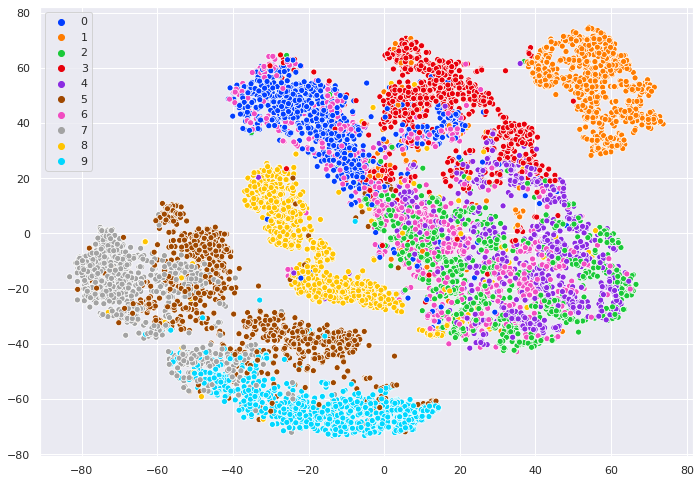

time: 1.41 s


In [0]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=Y, legend='full', palette=palette)

* Visualize os dados em duas dimensões. Você percebe agrupamentos naturais nos dados?
* R: É dificil ver agrupamentos desta forma, já que varios pontos se sobrepoem.

In [0]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
y_km = km.fit_predict(X_embedded)

time: 488 ms


* Aplique novamente o agrupamento que teve melhores resultados no passo anterior (sem t-SNE) considerando k=10.

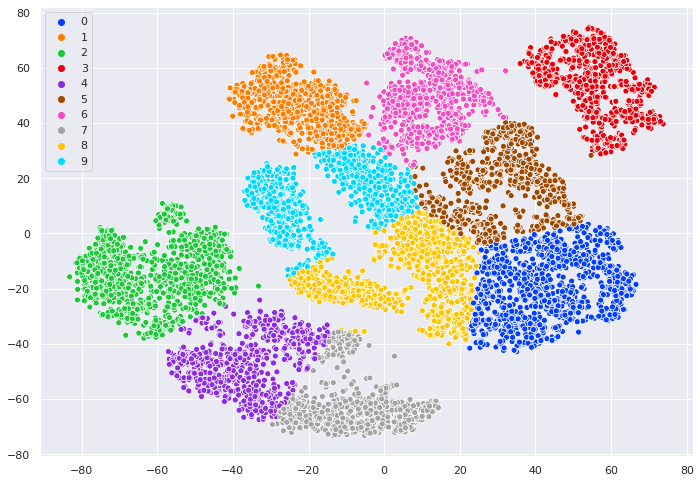

time: 1.11 s


In [0]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_km, legend='full', palette=palette)

In [0]:
print("Coeficiente de Silhueta t-SNE: %0.3f" % metrics.silhouette_score(X_embedded, y_km,metric='euclidean'))
print("Pureza t-SNE: %0.3f"  %purity2(X,Y,y_km,10)[1])

Coeficiente de Silhueta t-SNE: 0.432
Pureza t-SNE: 0.588
time: 1.31 s


In [0]:
km = (KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0))
y_km = km.fit_predict(X)

time: 12.3 s


In [0]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X, y_km, metric='euclidean'))
print("Pureza K-Means: %0.3f" %purity2(X,Y,y_km,10)[1])

Coeficiente de Silhueta K-Means: 0.153
Pureza K-Means: 0.649
time: 3.64 s


* Analise a silhueta e pureza do agrupamento. O que aconteceu com os resultados quando comparamos com a versão sem usar t-SNE? Que conclusões você pode tirar? 
* R: Ao usar o t-SNE em conjunto com o K-means, vemos que os conjuntos são melhor classificados (pureza) sem o t-SNE, porem ficam melhor separados (silhueta). 

## PCA

In [0]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

time: 163 ms


* Reduza a quantidade de dimensões para duas dimensões.

In [0]:
pca = PCA(n_components=2)
PCA_X = pca.fit_transform(X_scaled)

time: 481 ms


* Visualize os dados em duas dimensões. Você percebe agrupamentos naturais nos dados?

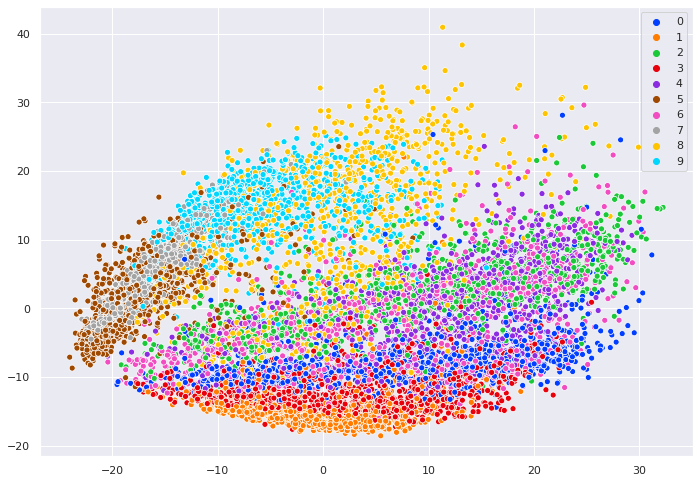

time: 1.12 s


In [0]:
sns.scatterplot(PCA_X[:,0], PCA_X[:,1], hue=Y, legend='full', palette=palette)

In [0]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
y_km = km.fit_predict(PCA_X)

time: 933 ms


* Aplique novamente o agrupamento que teve melhores resultados no passo anterior (sem PCA) considerando k=10. 

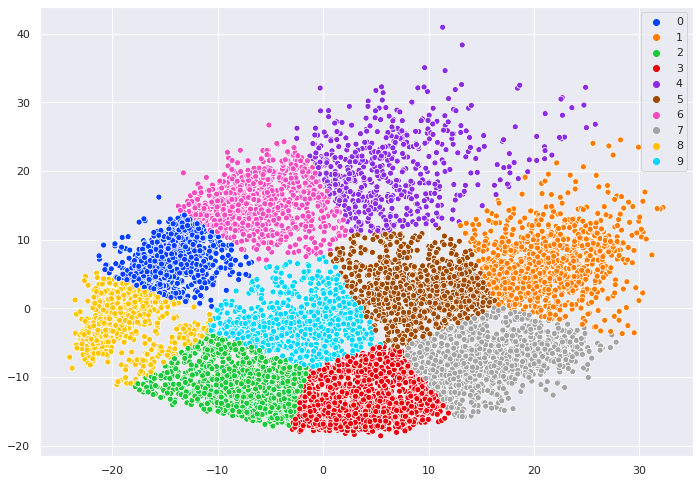

time: 1.02 s


In [0]:
sns.scatterplot(PCA_X[:,0], PCA_X[:,1], hue=y_km, legend='full', palette=palette)

In [0]:
print("Coeficiente de Silhueta PCA: %0.3f" % metrics.silhouette_score(PCA_X, y_km,metric='euclidean'))
print("Pureza PCA: %0.3f"  %purity2(PCA_X,Y,y_km,10)[1])

Coeficiente de Silhueta PCA: 0.397
Pureza PCA: 0.439
time: 1.3 s


In [0]:
km = (KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=0))
y_km = km.fit_predict(X)

time: 12.3 s


In [0]:
print("Coeficiente de Silhueta K-Means: %0.3f" % metrics.silhouette_score(X, y_km, metric='euclidean'))
print("Pureza K-Means: %0.3f" %purity2(X,Y,y_km,10)[1])

Coeficiente de Silhueta K-Means: 0.153
Pureza K-Means: 0.649
time: 3.62 s


* Analise a silhueta e pureza do agrupamento. O que aconteceu com os resultados quando comparamos com a versão sem usar PCA? Que conclusões você pode tirar?
* R: O mesmo que aconteceu com o t-SNE, também se repete aqui, melhora na silhueta e piora na pureza. Isso comprova que esses metodos são bons para separação, mas não tão bons para classificação.


* Teste diferentes números de dimensões para tentar melhorar os resultados.

In [0]:
purity_array = []
for n in range(1,21):
    pca = PCA(n_components=n)
    PCA_X = pca.fit_transform(X_scaled)
    km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
    y_km = km.fit_predict(PCA_X)
    #purity_label = purity(Y,y_km)[1]
    purity_label = purity2(PCA_X,Y,y_km,10)[1]
    purity_array.append(purity_label)

time: 31.9 s


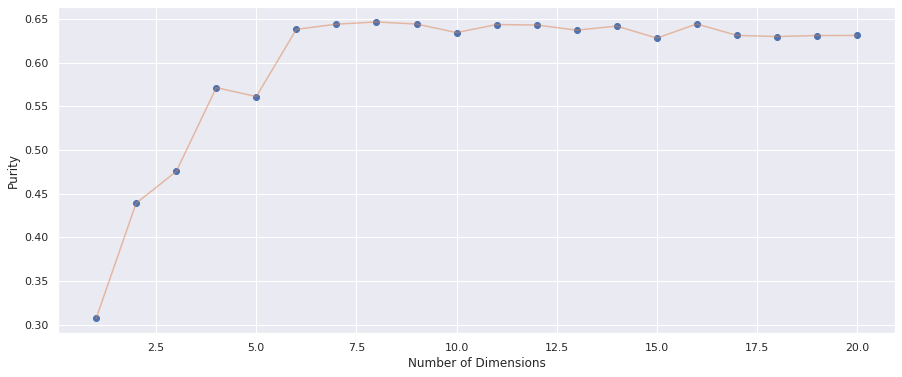

time: 388 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,21), purity_array, 'o')
plt.plot(np.arange(1,21),purity_array, '-',alpha=0.5)
plt.xlabel('Number of Dimensions'), plt.ylabel('Purity')
plt.show()

In [0]:
silhouette_array = []
for n in range(2,11):
    pca = PCA(n_components=n)
    PCA_X = pca.fit_transform(X_scaled)
    km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state = 0)
    y_km = km.fit_predict(PCA_X)
    silhouette_label = metrics.silhouette_score(PCA_X, y_agg,metric='euclidean')
    silhouette_array.append(silhouette_label)

time: 24.8 s


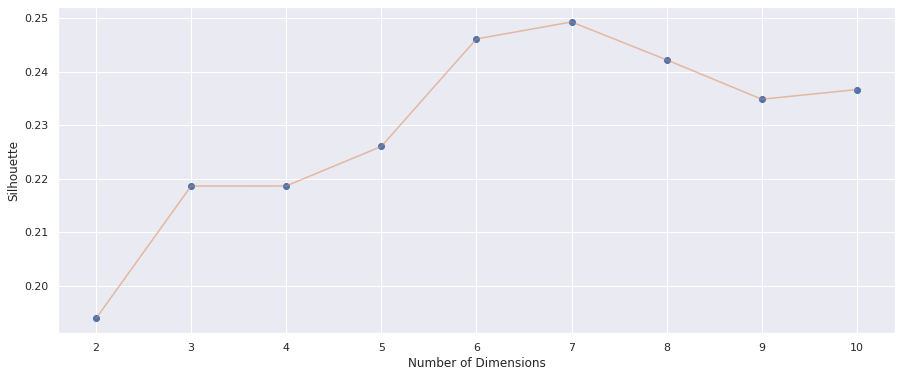

time: 385 ms


In [0]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(2,11), silhouette_array, 'o')
plt.plot(np.arange(2,11),silhouette_array, '-',alpha=0.5)
plt.xlabel('Number of Dimensions'), plt.ylabel('Silhouette')
plt.show()

* O numero de dimensões que tem a melhor pureza é 7 com 6.5 (tão bom quanto o k-means puro) e o número de dimensões que melhora a silhueta é 3.

## Bonus

* Separe o conjunto de dados em treino e teste na proporção 75%/25% respectivamente.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 42)

time: 97.2 ms


* Treine um modelo de sua escolha com os dados originais. 
    * Compute a acurácia e o f1-score

In [0]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred,average='micro'))

F1 Score: 0.8316
time: 1.81 s


* Treino um modelo de sua escolha com os dados em dimensionalidade reduzida. Utilize a técnica de redução de dimensionalidade e parâmetros que obtiveram melhores resultados.

In [0]:
X_scaled = scale.fit_transform(X)
pca = PCA(n_components=60)
PCA_X = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(PCA_X, Y, test_size = .25, random_state = 42)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred,average='micro'))

F1 Score: 0.8056000000000001
time: 3.22 s


* Por último, compare os resultados.

Conforme pode ser observado, é possivel obter um f1-score similar com bem menos elementos que o conjunto original deixando o treinamento menos custoso. 